<a href="https://colab.research.google.com/github/orin00/colab/blob/main/240308_%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
x = [1, 1, 1, 2, 3, 5, 5, 7, 8, 9]

### 모분산 만들기
### 각 데이터를 평균에서 빼고 제곱한뒤에, 모두 더하고 그걸 데이터의 갯수로 나눔

def population(x):
    sum_x = 0
    for i in x:
        sum_x += i
    avg = sum_x / len(x)
    vsum = 0 # vsum 전역변수로 설정해야 한다.
    for j in x:
        vsum += (avg - j) ** 2
    popv = vsum / len(x)
    return popv


### 표본분산 만들기
### 각 데이터를 평균에서 빼고 제곱한뒤에, 모두 더하고 그걸 데이터의 갯수 -1 로 나눔

def sample(x):
    sum_x = 0
    for i in x:
        sum_x += i
    avg = sum_x / len(x)
    vsum = 0 # vsum 전역변수로 설정해야 한다.
    for j in x:
        vsum += (avg - j) ** 2
    samv = vsum / (len(x) - 1)
    return samv

In [36]:
population(x)

8.36

In [37]:
sample(x)

9.288888888888888

In [42]:
import numpy as np

print(np.var(x)) # 넘파이는 모분산이 디폴트값
print(np.var(x,ddof=1)) # ddof를 1로 해야 표본분산이 구해진다.

# 판다스는 표본분산이 디폴트값

8.36
9.288888888888888


In [50]:
# 평균하고 표준편차를 많이 쓴다.
# 분산은 제곱을 해서 값이 너무 크게 나오기 때문에 많이 쓰지 않는다.
# 분산에 루트씌우면 된다.

# 모 표준편차
def sd_population(x):
    sum_x = 0
    for i in x:
        sum_x += i
    avg = sum_x / len(x)
    vsum = 0 # vsum 전역변수로 설정해야 한다.
    for j in x:
        vsum += (avg - j) ** 2
    popv = vsum / len(x)
    sd_popv = popv ** (1/2)
    return sd_popv

# 표본 표준편차
def sd_sample(x):
    sum_x = 0
    for i in x:
        sum_x += i
    avg = sum_x / len(x)
    vsum = 0 # vsum 전역변수로 설정해야 한다.
    for j in x:
        vsum += (avg - j) ** 2
    samv = vsum / (len(x) - 1)
    sd_samv = samv ** (1/2)
    return sd_samv

In [49]:
sd_population(x)

2.891366458960192

In [48]:
sd_sample(x)

3.0477678535099892

In [53]:
print(np.std(x)) # 넘파이의 모 표준편차
print(np.std(x, ddof=1)) # 넘파이의 표본 표준편차

2.891366458960192
3.0477678535099892


이상치를 찾아라

In [104]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

In [105]:
# fare(요금)의 데이터의 범위
fare_min = df['fare'].min()
fare_max = df['fare'].max()
print(fare_min, fare_max)

0.0 512.3292


In [106]:
len(df['fare'])*0.25

222.75

In [107]:
q1 = sorted(df['fare'])[222]
q1

7.8958

In [108]:
len(df['fare'])*0.75

668.25

In [109]:
q3 = sorted(df['fare'])[668]

In [117]:
print('q1 : ', q1, '/ q3 : ',q3)

q1 :  7.8958 / q3 :  31.0


In [111]:
iqr = q3 - q1
iqr

23.1042

In [112]:
minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)

In [114]:
outlier_min = df[df['fare'] < minimum]
outlier_max = df[df['fare'] > maximum]
print(outlier_min.shape[0])
print(outlier_max.shape[0])

0
116


In [98]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
minimum = q1 - (1.5 * iqr)
maximum = q3 + (1.5 * iqr)
outlier_min = df[df['fare'] < minimum]
outlier_max = df[df['fare'] > maximum]

print("Number of outliers below the lower bound:", outlier_min.shape[0])
print("Number of outliers above the upper bound:", outlier_max.shape[0])


Number of outliers below the lower bound: 0
Number of outliers above the upper bound: 116


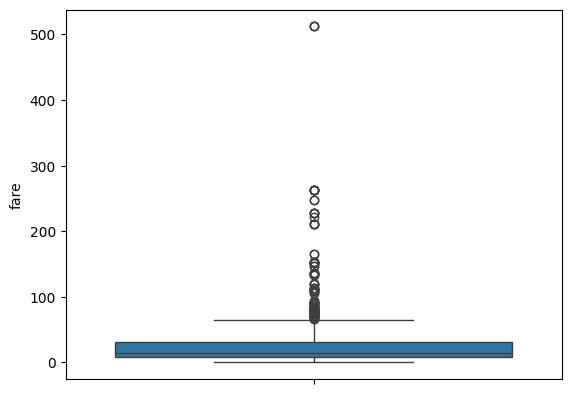

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['fare'])
plt.show()

In [183]:
import random

# 맞춘 횟수
stay = 0
change = 0

# 반복 횟수
cycle = 10000


for i in range(cycle):
  door = [0, 0, 0, 1] # 1은 당첨, 0은 꽝
  random.shuffle(door) # 문 뒤의 숫자를 랜덤하게 셔플하기.

  select = random.randint(0, 3) # 0,1,2 세개 중에서 내가 처음 선택하는 문의 번호
  first_choice = door[select] # 처음 선택한 문의 번호를 저장

  del(door[select]) # 선택한 값을 하나 삭제 = 당첨일 수도 있고, 아닐 수도 있음

  # 염소를 보여줘야하는 문을 선택해서 염소인 문을 삭제
  if door[0] == 1:
    del(door[1])
  elif door[1] == 1:
    del(door[0])
  else:
    random.shuffle(door)
    del(door[0])

  stay += first_choice # 선택을 바꾸지 않는다. => 선택 유지
  change += door[0] # 선택을 바꾼다. => 남은 door 두 개 중에 하나 선택

print('선택을 바꾸지 않은 경우 : ', stay)
print('선택을 바꾼 경우 : ', change)

선택을 바꾸지 않은 경우 :  2447
선택을 바꾼 경우 :  5821
